In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spamclassfierdata.csv to spamclassfierdata.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spamclassfierdata.csv']))

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
#since the machine learning model don't understand text but they do understand numbers. We are converting categorical data into numbers
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)


In [ ]:
df.head(3)  # So here spam emails are represented as 1 and ham emails are represesnted as 0

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [ ]:
df.value_counts(df['spam'])

spam
0    4825
1     747
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message,df.spam, test_size = 0.25, random_state = 0)

Once train and test is splitted, we still have one column which is text and definitely we have to convert it into numbers. 
The way we are going to do is by using **CountVectorizer technique.**
In **CountVectorizer Technique** 
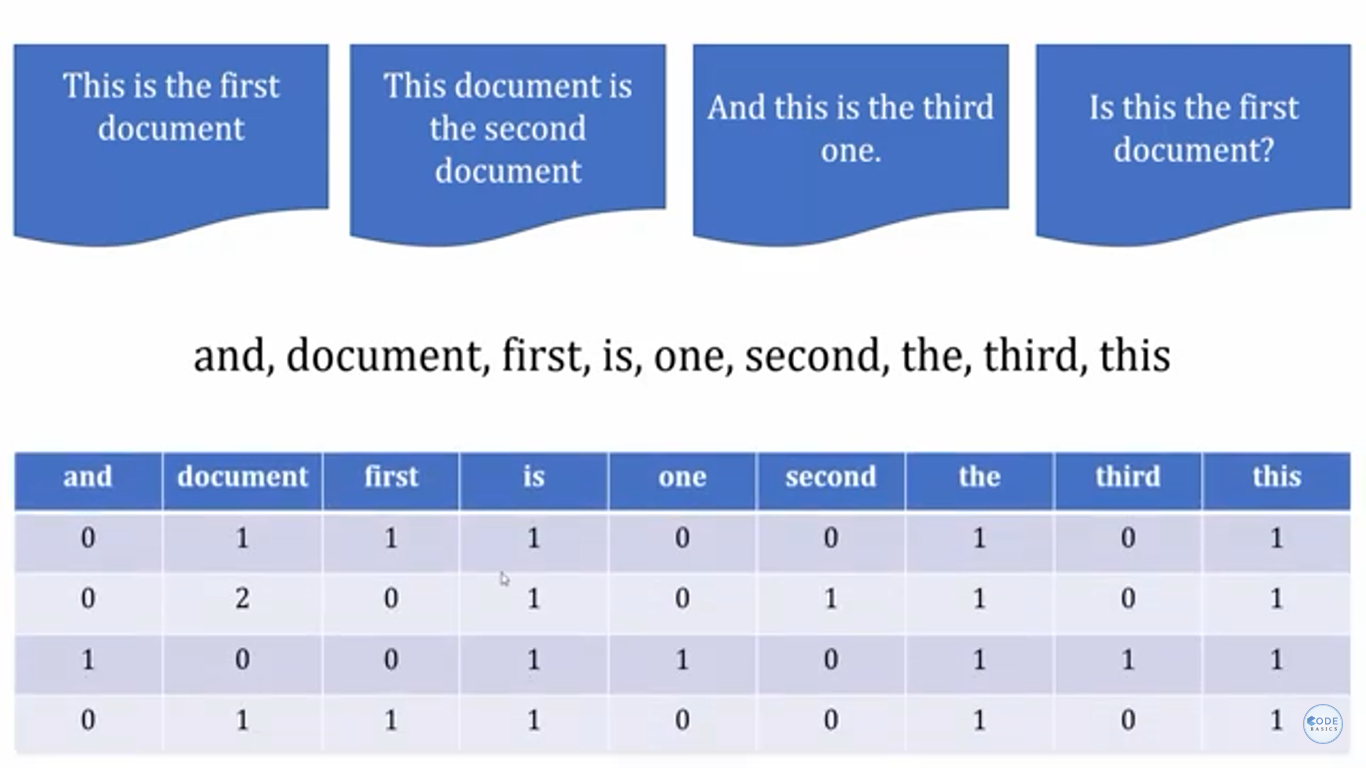

let say you have these four documnets or the email bodies with all these text. One of the way is to convert this into matrix or vector is, find out unique words in each of these documents. and we find that there are nine uniqe words(and, document, first, is, one,secoond, the, third,this) combinely in all these documents. Now we can treat all these unique words as features and build vector or column as shown above.
Each row is the separte document and '0' means doesn't occured and '1' means occoured for eg. **'and'** doesn't appeared in 1,2,and 4th documents it only appeared in 3rd document. and **'document'** only appeared in 2nd doc twice.

So this is a simple technique of representing words as count and we can use each columns as features for our problems.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#it creates a number of features and features are number of unique words in corpus (entire data)

In [ ]:
#we are going to use multinomial naive bayes for our problem
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [ ]:
#let's predict some emails to check the model
email = ['Hey saif, can we get together to watch cricket game tomorrow?',
          "Upto 20% discount on shopping, exclusive offer just for you. Don't miss the reward!"]

In [ ]:
emails_count = v.transform(email)   #we need to transform out text mail to array numbers because ml model works on numbers

In [ ]:
model.predict(emails_count)

array([0, 1])

In [ ]:
def transf(x):
  y = v.transform(x)
  return model.predict(y)

In [ ]:
x = ['Hello Mom, How are you?']
transf(x)

array([0])

In [ ]:
xz = ["Don't miss the summer offer. Flat 50 % off on selected products. also checkout our Buy 2 Get 1 Free section",'dear mom, as i am working on some project i will not be able to come home today, do not worry and please take care of yourself']

In [ ]:
transf(xz)

array([0, 0, 0])